In [4]:
import pandas as pd
import math
import fasttext
from keras.preprocessing.text import text_to_word_sequence,Tokenizer

In [5]:
cc_types = 'is_anagram	is_homophone	is_double	is_cryptic	is_contain	is_reverse	is_alternate	is_init	is_delete	is_&lit	is_hidden	is_spoonerism	is_palindrome'.split('	')

In [6]:
upsampled_input_cc_types_df = pd.read_csv("../upsampled_train_val_test/train_no_charade.csv")

In [7]:
val_cc_types_df = pd.read_csv("../upsampled_train_val_test/val_no_charade.csv")

In [8]:
test_cc_types_df = pd.read_csv("../upsampled_train_val_test/test_no_charade.csv")

In [45]:
tokenizer = Tokenizer(filters='"#$%&()*+-/:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(pd.concat([upsampled_input_cc_types_df,val_cc_types_df,test_cc_types_df])['clue'])

In [46]:
cc_input_df = upsampled_input_cc_types_df[['clue','category']]
cc_val_df = val_cc_types_df.drop_duplicates()[['clue','category']]
cc_test_df = test_cc_types_df.drop_duplicates()[['clue','category']]

In [47]:
cc_input_df['clue'] = cc_input_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))
cc_val_df['clue'] = cc_val_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))
cc_test_df['clue'] = cc_test_df['clue'].apply(lambda x:' '.join(text_to_word_sequence(x)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
cc_input_df['fasttext_input'] = cc_input_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_input_df['clue']
cc_val_df['fasttext_input'] = cc_val_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_val_df['clue']
cc_test_df['fasttext_input'] = cc_test_df['category'].apply(lambda x:'__label__'+x+' ,').map(str)+cc_test_df['clue']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
cc_input_df['fasttext_input'].to_csv("cc_input_df_ft_no_charade.txt",sep=' ',header=False, index=False)
cc_val_df['fasttext_input'].to_csv("cc_val_df_ft_no_charade.txt",sep=' ',header=False, index=False)

In [17]:
model_5_epoch = fasttext.supervised('cc_input_df_ft_no_charade.txt','model_5_epoch',epoch=5, dim=150)

In [54]:
model_10_epoch = fasttext.supervised('cc_input_df_ft_no_charade.txt','model_10_epoch',epoch=10)

In [55]:
model_20_epoch = fasttext.supervised('cc_input_df_ft_no_charade.txt','model_20_epoch',epoch=20)

In [32]:
model_pretrained = fasttext.load_model("../model_5_epoch_pretrained.bin")

In [33]:
results = model_pretrained.test('cc_val_df_ft_no_charade.txt')

In [34]:
results.precision

0.5015625

In [35]:
results.recall

0.5015625

In [36]:
results.nexamples

1920

In [37]:
cc_types_dict = {k: v for v, k in enumerate(cc_types)}

In [38]:
val_pred = model_5_epoch.predict(cc_val_df['clue'])

In [39]:
val_pred = [cc_types_dict[pred[0]] for pred in val_pred]

In [40]:
val_out = [cc_types_dict[pred] for pred in cc_val_df['category'].tolist()]

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
cnf_matrix = confusion_matrix(val_out,val_pred)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[508  11   2  27  82  28   0  10 108   1  13   0   1]
 [ 14 119   0   7  10   4   0   0  18   0   0   0   0]
 [ 31   3   2  13  12   2   1   1  25   0   7   0   0]
 [ 78   8   3  66  26  12   0   3  46   1   9   0   0]
 [  5   0   0   0  45   3   0   1   6   0   2   0   0]
 [ 10   0   1   2  21  63   0   1  17   0   0   0   0]
 [  0   0   0   1   0   0   4   0   0   0   0   0   0]
 [ 13   1   0   1  11   3   2  21  47   0   1   0   0]
 [ 17   2   0   1  14   5   1   4  40   0   1   0   0]
 [ 11   1   0   2   3   4   1   1   7   0   0   0   0]
 [ 31   2   3   6  51   8   1   0  36   0  42   0   0]
 [  0   0   0   0   1   0   0   0   0   0   0  21   0]
 [  1   1   0   0   0   5   0   0   0   0   0   0   2]]
Normalized confusion matrix
[[0.64 0.01 0.   0.03 0.1  0.04 0.   0.01 0.14 0.   0.02 0.   0.  ]
 [0.08 0.69 0.   0.04 0.06 0.02 0.   0.   0.1  0.   0.   0.   0.  ]
 [0.32 0.03 0.0

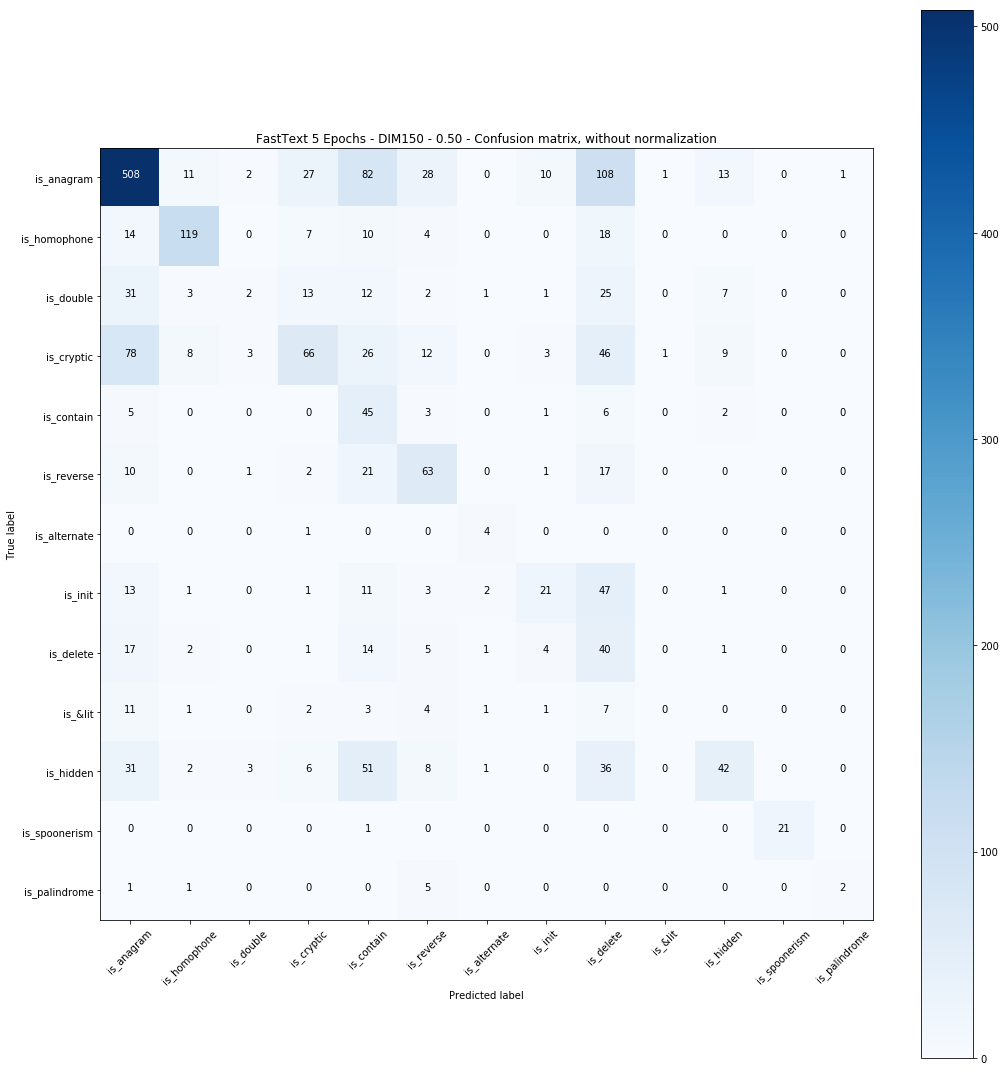

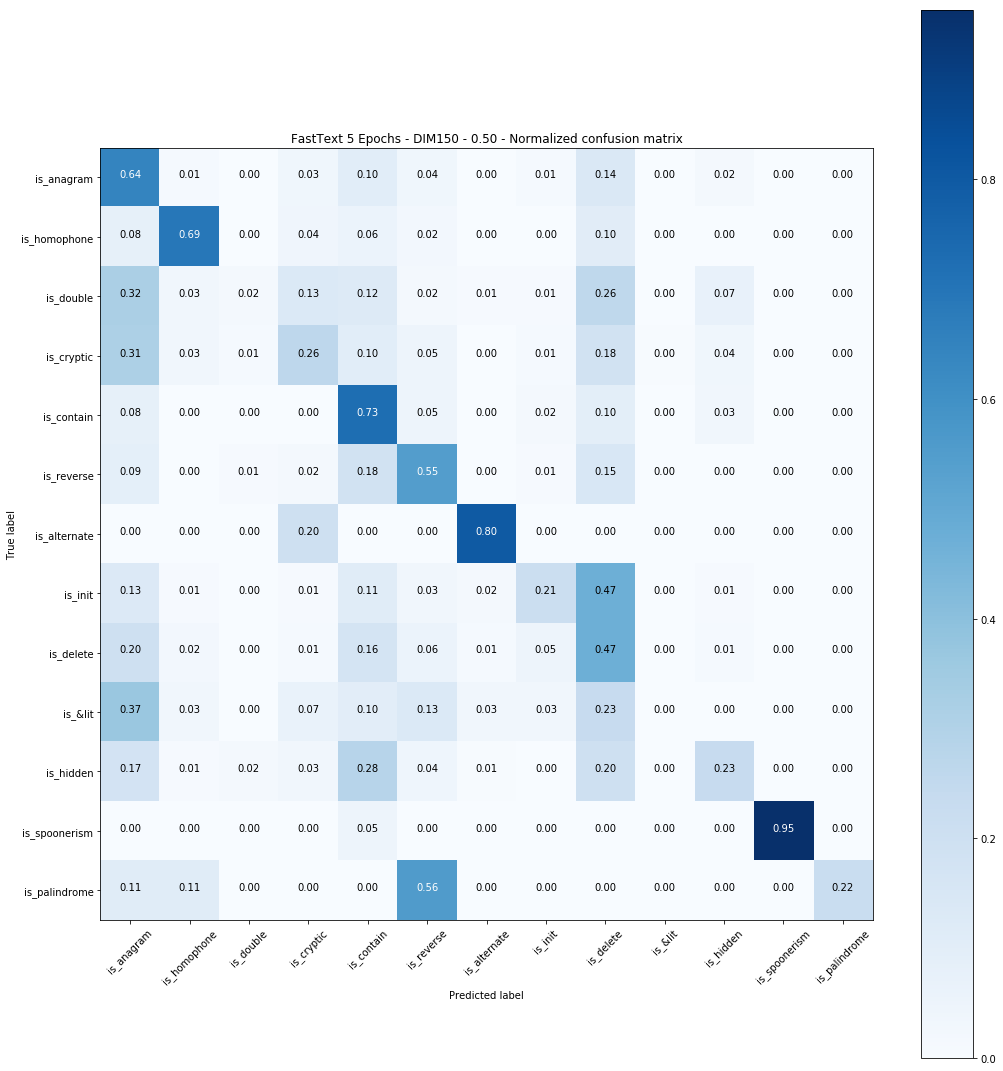

In [44]:
print(__doc__)

import itertools
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

matplotlib.matplotlib_fname()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
np.set_printoptions(precision=2)
class_names = cc_types
# Plot non-normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='FastText 5 Epochs - DIM150 - 0.50 - Confusion matrix, without normalization')

plt.savefig("pretrained_unnormalized")
# Plot normalized confusion matrix
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='FastText 5 Epochs - DIM150 - 0.50 - Normalized confusion matrix')

plt.savefig("pretrained_normalized")

In [30]:
# model_5_epoch_pretrained = fasttext.supervised('cc_input_df_ft_no_charade.txt','model_5_epoch_pretrained',epoch=5,pretrained_vectors="./crawl-300d-2M-subword.vec")